# Automates finis - TP 1 


## Objectif du TP

L'objectif de ce premier TP est d'implémenter un programme en **Python** qui prend deux entrées : 

1. un fichier `.txt` contenant la description d'un automate fini _A_ et
2. un mot _m_ à reconnaître. 

Votre programme doit (a) lire/charger l'automate _A_ à partir du fichier `.txt`, (b) afficher _ERROR_ si l'automate est non déterministe, ou (c) si, au contraire, l'automate est déterministe, afficher _YES_ si le mot peut être reconnu par l'automate, ou _NO_ si le mot ne peut pas être reconnu par l'automate. En pseudo-code, cela donne :
```txt
1. A = automate(fichier)
2. si deterministe(A) alors
3.    si reconnait(A,m) alors
4.      afficher "YES"
5.    sinon
6.      afficher "NON"
7. sinon
8.   afficher "ERROR"
```

## Environnement de travail

**Énoncés**: les énoncés des TPs d'automates finis sont disponibles en deux formats sur Ametice : PDF et notebook Jupyter `.ipynb`. Le notebook Jupyter contient du code python intégré que vous pouvez exécuter directement. C'est carrément cool ! Le PDF est statique, donc moins marrant, mais il est là au cas où, pour éviter d'être bloqué.e en cas de souci avec le notebook Jupyter.

<!--Alternativement, [installez Jupyter sur votre ordinateur](https://jupyter.org/install) (avec Anaconda, ou séparément), puis ouvrez le notebook [Automates_TP1.ipynb](https://github.com/ceramisch/automatesfinis/blob/main/Automates_TP1.ipynb), ou alors ouvrez-le en utilisant [Google Colab](https://colab.research.google.com/).-->

**Travailler en salle TP** Vous devrez écrire un programme `tp1automates.py` en langage **Python** pour implementer le pseudo-code ci-dessus. L'énoncé au format notebook Jupyter vous permet de tester des bouts de code, mais vous ne devez pas programmer sur les notebook Jupyter directement. En salle TP, utilisez l'environnement de programmation **Spyder** disponible sur la session **Linux/Luminy**. Pour travailler à la maison, consultez la fin l'énoncé. Mais avant de faire tout cela, il faut **lire tout l'énoncé** pour se familiariser avec la bibliothèque fournie.  Eh oui, on ne se met pas à coder tout de suite...

**Dépôt de fichiers**: les TP sont incrémentaux : on a besoin du TP1 pour faire le TP2, etc... Cela aboutira à la création d'un programme capable de reconnaître, à l'aide d'un automate fini, si un _mot_ quelconque appartient au langage dénoté par une _expression régulière_ quelconque. Prenez un moment pendant la séance d'aujourd'hui pour préparer votre environnement de travail. Nous vous conseillons de créer un dépôt de contrôle de version `git` pour ce mini-projet sur [etulab](https://etulab.univ-amu.fr) (ou gitlab, github... au choix). Vous pouvez aussi travailler sur un dossier partagé Dropbox, Google Drive ou AMUBox. Dans tous les cas, sauvegardez vos fichiers à la fin de chaque séance.


## Format de fichier `.txt`

Un automate décrit dans un fichier `txt` consiste en une suite de lignes, où chaque ligne est un triplet, sauf la dernière. Les éléments du triplet sont séparés par des espaces. Le triplet `X a Y` correspond à une transition entre un état source `X` et un état cible `Y` étiquetée par le symbole `a`. Il est recommandé de représenter les états `X` et `Y` avec des nombres, et les symboles `a` avec des lettres majuscules ou minuscules non-accentuées. Le symbole spécial `%` est utilisé pour les transition-ε (pour le moment, pas nécessaire). Le premier état source de la première transition est considéré comme l'état initial de l'automate. La dernière ligne est toujours précédée de la lettre majuscule `A` indiquant les états d'acceptation. Ensuite, les états d'acceptation sont listés, séparés par des espaces.

Voici un exemple d'automate déterministe décrit dans un fichier. Cet automate reconnait _a\*+b\*_. Pour vous en convaincre, vous pouvez le dessiner sur une feuille. 

In [1]:
source = """0 a 1
0 b 2
1 a 1
2 b 2
A 0 1 2
"""
print(source) # affiche la variable qui vient d'être initialisée ci-dessus

0 a 1
0 b 2
1 a 1
2 b 2
A 0 1 2



_Note pour vous qui ne connaissez pas encore les notebook Jupyter_ : vous pouvez exécuter la cellule ci-dessus (se placer dans la cellule puis appuyer sur `⏵Exécuter` en haut de la page, ou `Ctrl+Entrée` pour le raccourci clavier). Cela va afficher la valeur de la variable `source`. Essayez de la modifier et voyez que l'affichage change. Sur ce notebook Jupyter, l'état des variables est gardé d'une cellule à l'autre. Voilà, vous savez maintenant comment utiliser un notebook Jupyter.

## Bibliothèque `automaton.py` fournie

Nous vous fournissons une bibliothèque python `automaton.py`, disponible sur [le github du cours](https://github.com/ceramisch/automatesfinis), avec les fonctionnalités suivantes:
*   Création et manipulation d'un objet `Automaton` qui représente un automate fini 
*   Lecture et écriture à partir d'un fichier textuel
*   Affichage graphique à l'aide de `graphviz`

Vous devez bien comprendre le fonctionnement de cette bibliothèque. En particulier, elle utilise de la programmation orientée objets en Python. Les prochaines sections vous permettent de découvrir la bibliothèque. Si vous êtes à l'aise en Python, vous pouvez ouvrir le code de la bibliothèque et le modifier, mais cela ne devrait pas être nécessaire.

### Premier pas avec `automaton.py`

Mais pour le moment, essayons déjà de comprendre son fonctionnement. Pas besoin de télécharger quoi que ce soit, la bibliothèque est déjà intégrée au notebook Jupyter (vous devrez téléchrger la bibliothèque sur votre ordinateur plus tard). Avec `automaton.py`, vous pouvez créer un nouvel automate et lui donner un nom. Cet automate, pour le moment, sera vide. Vérifiez en exécutant le code ci-dessous :

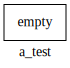

In [2]:
from automaton import Automaton
a_test = Automaton("a_test")
a_test

Le code ci-dessus affiche un automate vide. Essayez de changer son nom et exécutez à nouveau le bloc ci-dessus. Alternativement, vous pouvez `print(a_test)` pour afficher l'automate sous forme textuelle.

Notez la première ligne `import...` qui importe la bibliothèque automaton. Cela vous permet d'utiliser la bibliothèque par la suite.

Continuons à nous familiariser avec la bibliothèque sur ce notebook. Vous pouvez ajouter des états et des transitions à votre automate vide. Attention, la source de la première transition ajoutée sera toujours considérée comme l'état initial:

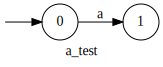

In [3]:
a_test.reset()
a_test.add_transition("0","a","1")
a_test

Notez que cet automate ne reconnait aucun mot, car il n'a aucun état d'acceptation/final. Vous pouvez marquer un ou plusieurs états comme finaux à l'aide de la fonction suivante:

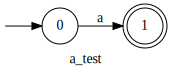

In [4]:
a_test.make_accept("1")
a_test

Alternativement, vous pouvez marquer plusieurs états comme états d'acceptation:

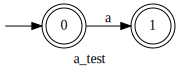

In [5]:
a_test.make_accept(["0","1"])
a_test

### Affichage textuel d'un automate

Vous pouvez afficher l'automate sous la forme textuelle à n'importe quel moment dans votre code, par exemple, pour déboguer. Notez que la fonction delta est donnée sous la forme d'un tableau de transitions:

In [6]:
print(a_test)

a_test = <Q={0,1}, S={a}, D, q0=0, F={0,1}>
D =
| |a|
-----
|0|1|
-----
|1| |
-----


Dans cet exemple, `Q` contient la liste d'états `{0,1}`, l'alphabet `S` est automatiquement construit à partir des transitions et contient uniquement le symbole `{a}`, l'état initial est `q0=0` et les états d'acceptation `F={0,1}`. Ces valeurs sont accessibles aussi directement, sous la forme de listes ou de chaînes de caractères, via des variables de l'automate (contrairement à Java, toutes les méthodes et attributs sont publics en Python) :

In [7]:
print(a_test.states)
print(a_test.alphabet)
print(a_test.initial)
print(a_test.acceptstates)
print(a_test.transition_table)

['0', '1']
['a']
0
['0', '1']
| |a|
-----
|0|1|
-----
|1| |
-----


Vous pouvez aussi afficher votre automate sous la forme de fichier `.txt`:

In [8]:
print(a_test.to_txtfile("test.txt"))

0 a 1
A 0 1


### Lecture à partir d'un fichier

Un automate peut être réinitialisé à tout moment:

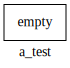

In [9]:
a_test.reset()
a_test

Vous pouvez aussi construire un automate à partir d'une chaîne de caractères directement à l'aide de la fonction `from_txt`:

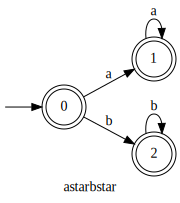

In [10]:
source = """0 a 1
0 b 2
1 a 1
2 b 2
A 0 1 2
"""
astarbstar = Automaton("astarbstar")
astarbstar.from_txt(source)
astarbstar

Essayez de modifier la variable `source` et observez le résultat dans l'automate. Ajouter ou supprimez des transitions, des états, des états d'acceptation...

Vous pouvez aussi lire un automate en passant directement le nom du fichier à la fonction `from_txtfile`:

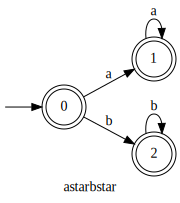

In [11]:
astarbstar.from_txtfile("test/astarbstar.af")
astarbstar


_Remarque_: la bibliothèque vous préviendra si quelque chose d'étrange se passe à l'aide des `WARNING`, comme ci-dessus lors que vous écrasez le contenu existant par le chargement d'un nouvel automate. Parfois ces messages vous aideront à ne pas faire de bêtise, d'autres fois vous pouvez les ignorer sans problèmes.

Les transitions-ε sont représentées par le symbole spécial `%` (constante `EPSILON` dans `automaton.py`). Vous pouvez créer un automate non-déterministe avec des transitions-ε comme ceci:

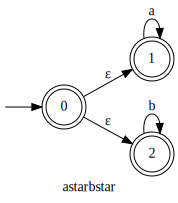

In [12]:
source = """0 % 1
0 % 2
1 a 1
2 b 2
A 0 1 2
"""
astarbstar.from_txt(source)
astarbstar

### Affichage graphique

Les automates sur ce notebook Jupyter s'affichent graphiquement à l'aide de la fonction `to_graphviz()` (qui est executée automatiquement en coulisses). La fonction renvoie l'objet `graphviz` au [format DOT](https://graphviz.org/doc/info/lang.html), converti ensuite en un fichier PDF. Il n'est pas nécessaire de rentrer dans le détail, la bibliothèque gère l'affichage pour vous. 

Pour afficher des automates graphiquement quand vous serez en train de travailler en local, sur votre code-source sur Spyder, il suffira d'appeler la fonction `to_graphviz("test")`. Un nouveau fichier `test.pdf` avec la représentation graphique de l'automate sera alos créé dans le même dossier contenant votre programme python (l'extension `.pdf` sera automatiquement ajoutée).

L'exécution du code ci-dessous n'affichera rien. Mais si vous allez sur `Fichier->Ouvrir...` et que vous regardez dans le dossier `test`, vous remarquerez que le fichier `astarbstar.gv.pdf` aura été modifié il y a peu de temps. C'est ce fichier qui contient le résultat de l'exécution du code ci-dessous. Vous pouvez le télécharger et le visualiser avec un lecteur de PDF.

In [13]:
astarbstar_gv = astarbstar.to_graphviz("test/astarbstar.gv")

### Structure interne des états et transitions

À certains moments, vous aurez besoin d'accéder à la liste des **états** et de **transitions** à l'intérieur de l'automate. Ainsi, il faut comprendre comment ces éléments sont représentés en interne. Prenez le temps de bien comprendre la structure, faites un schéma sur une feuille si besoin. Vous pouvez aussi regarder le code-source de la bibliothèque `automaton.py` directement. Cela vous aidera à mieux vous servir de la bibliothèque lors de ce TP et des suivants.

Chaque état est représenté comme un objet de la classe `State` et stocké dans un dictionnaire nommé `statesdict`. Les clés de ce dictionnaire sont les noms des états (`str`), et les valeurs sont les objets de type `State` :

In [14]:
astarbstar.statesdict

OrderedDict([('0', <automaton.State at 0x7f7a5ae06520>),
             ('1', <automaton.State at 0x7f7a584d1280>),
             ('2', <automaton.State at 0x7f7a584d1700>)])

Vous remarquerez l'usage d'un `OrderedDict` au lieu d'un dictionnaire python classique. La seule différence c'est que celui-ci conserve l'ordre d'insertion des paires clé-valeur, contrairement à un dictionnaire python standard. En pratique, c'est pareil.

Par exemple, pour accéder à l'objet `State` correspondant à l'état nommé `"1"`, vous pouvez accéder à `astarbstar.statesdict["1"]`, c'est-à-dire la valeur associée à la clé `"1"`, qui est un objet de la classe `State`. Chaque état contient une liste de transitions, aussi sous la forme d'un dictionnaire :

In [15]:
astarbstar.statesdict["1"].transitions

OrderedDict([('a',
              OrderedDict([(<automaton.State at 0x7f7a584d1280>, None)]))])

Nous voyons ci-dessus, par exemple, que l'état nommé `"1"` contient une transition pour le symbole `a` menant vers un autre dictionnaire d'états. Ce dictionnaire permet de prendre en compte les transitions vers plusieurs états dans les automates non déterministes. Pour accéder à l'état destination de la transition, on doit d'abord transformer le dictionnaire en liste, puis récupérer le premier élément de cette liste, et finalement afficher cet état comme une chaîne de caractères `str`. Mis bout à bout, cela donne :

In [16]:
# source state 1 (from dict of states), transition on "a", first (and only) destination state "1"
str(list(astarbstar.statesdict["1"].transitions["a"])[0])

'1'

Ouf ! C'est bien complexe, mais cela permet de représenter n'importe quel automate fini déterministe ou non déterministe.

Alternativement, utilisez l'attribut `transitions` de l'automate, qui donne la liste de transitions sous la forme d'une `list` python simple. Chaque transition est une tuple de trois éléments de type `str` : source, symbole, destination. Cela peut être pratique, si vous voulez manipuler des objets plus simples que les dictionnaires et les objets `State` :

In [17]:
for (source,symb,dest) in astarbstar.transitions : # et non pas a.transitions()
  print( "{} --{}--> {}".format(source,symb,dest))

0 --%--> 1
0 --%--> 2
1 --a--> 1
2 --b--> 2


Vous trouverez d'autres exemples d'usage de la bibliothèque dans `automaton.py` à la toute fin du code-source.

## Travail à effectuer

Votre travail consiste à implémenter deux fonctionnalités:

1.   Écrire une fonction qui prend un automate fini en entrée et qui renvoie un booléen pour indiquer si, oui ou non, l'automate est déterministe

2.   Écrire une fonction qui prend un automate fini déterministe et un mot en entrée, et qui renvoie un booléen pour indiquer si, oui ou non, le mot est reconnu par l'automate

De plus, vous devez écrire un script/programme qui peut être exécuté sur un terminal et qui prend en entrée (`sys.argv`) deux [arguments](https://riptutorial.com/fr/python/example/6530/utilisation-d-arguments-en-ligne-de-commande-avec-argv): un fichier texte contenant un automate et un mot à reconnaître, dans cet ordre. Si vous ne connaissez pas les arguments `argv`, lisez le tutoriel ci-dessus. Ces arguments seront spécifiés dans Spyder à l'aide du menu _Run > Configuration per file_ (voir détail ci-dessous).

Le script doit :

1.   Charger l'automate depuis le fichier texte (à l'aide de la bibliothèque fournie)

2.   Vérifier si l'automate est déterministe (fonctionnalité 1 ci-dessus) et, sinon, afficher _ERROR_

3.   Si l'automate est déterministe, vérifier s'il reconnaît le mot (fonctionnalité 2 ci-dessus) et afficher _YES_ si le mot est reconnu, _NO_ sinon

Une version squelette de `tp1automates.py` est fournie sur le [dépôt git du cours](https://github.com/ceramisch/automatesfinis/). Utilisez-la comme point de départ de votre TP. Vous n'aurez qu'à compléter les deux fonctions indiquées `is_deterministic` et `recognizes`, le reste est déjà fait pour vous.

## Étapes à suivre pas à pas
#### ou "Comment éviter de se perdre lors du TP1"

1. Lire la **totalité** de l'énoncé au format notebook Jupyter, tester les bouts de code, comprendre comment marche la bibliothèque `automaton.py`. Normalement, c'est ce que vous venez de faire.
2. Télécharger depuis le [dépôt git du cours](https://github.com/ceramisch/automatesfinis/) la totalité du dossier `automatesfinis-main.zip` (Cliquer sur _Code_ > _Download ZIP_)
3. Extraire les fichiers dans un dossier bien identifié, pour pouvoir le retrouver plus tard
4. Ouvrir l'environnement Spyder, et ouvrir le squelette `tp1automates.py` fourni dans `automatesfinis-main` avec Spyder
5. Configurer l'environnement avec les arguments de la ligne de commande comme suit :
  - Sur Spyder, avec `tp1automates.py` ouvert, cliquer sur _Run_ > _Configuration per file_
  - Cocher la case _Command line options_ et indiquer dans le champ textuel (a) le nom d'un fichier contenant un automate fini au format textuel et (b) un mot à reconnaître. Par exemple, pour commencer, vous pouvez écrire : <br/>`test/astarbstar.af aaa` -- où `test/astarbstar.af` est le chemin relatif du fichier (fourni). N'oubliez pas l'espace entre le nom du fichier `test/astarbstar.af` et le mot à reconnaître `aaa` <br/>Vous modifierez l'automate et le mot à reconnaître au fur et à mesure que vous avancez dans les TP pour tester d'autres automates, d'autres mots à reconnaître ou ne pas reconnaître.
  - Les valeurs de ces deux arguments sont disponibles dans votre script dans la variable spéciale `sys.argv`
6. Comprendre le squelette : le `main` vérifie les deux arguments de la ligne de commande `sys.argv[1]` et `sys.argv[2]`. Ensuite, il initialise un objet de la classe `Automaton` et appelle deux fonctions pour afficher `ERROR`, `YES` ou `NO`.
7. Implémenter les deux fonctions attendues : `is_deterministic` et `recognizes` 
8. Avant la fin du TP, mettre en place un dépôt git sur [etulab](https://etulab.univ-amu.fr) pour organiser le travail pour la prochaine séance

## Tester votre programme

Quelques fichiers de test vous sont fournis dans le dossier `test`. Voici quelques exemples de ce que doit afficher l'exécution pour votre programme `tp1automates.py` sur le terminal :

```bash
$ ./tp1automates.py test/astarbstar.af a
YES
$ ./tp1automates.py test/astarbstar.af b
YES
$ ./tp1automates.py test/astarbstar.af bbb
YES
$ ./tp1automates.py test/astarbstar.af %
YES
$ ./tp1automates.py test/astarbstar.af aaaaaaa
YES
$ ./tp1automates.py test/astarbstar.af bbaa
NO
$ ./tp1automates.py test/astarbstar.af aba
NO
$ ./tp1automates.py test/astarbstar.af aabbb
NO
$ ./tp1automates.py test/astarbstar.af abc
NO
$ ./tp1automates.py test/astarbstar-epsilon.af abb
ERROR
$ ./tp1automates.py test/astarbstar-nfa.af abb
ERROR
```

Vous devez non seulement implémenter le programme mais aussi le tester. Pour cela, écrivez 3 automates finis au format textuel pour augmenter la base de tests au délà des deux fichiers fournis dans le dossier `test`. Vous pouvez utiliser des automates vus en cours ou en TD, par exemple. Ces automates doivent être placés dans le dossier `test` et formeront votre base de tests, qui grandira au fur et à mesure des TPs. Vous pouvez générer les `.pdf` correspondants à chaque automate test à l'aide de la fonction `to_graphviz()`

Pour déboguer votre programme, n'oubliez pas que vous pouvez à tout moment appeler `print(a)` pour afficher l'automate sur le terminal, ou appeler `a.to_graphviz("out")` pour le visualiser graphiquement dans un fichier `out.pdf`.

## Travailler à la maison

Si vous avez l'habitude de travailler sur une IDE telle que intelliJ, eclipse, pycharm ou Spyder, utilisez-la. Sinon, installez Anaconda+Spyder, comme en salle TP. Alternativement, vous pouvez programmer avec un simple éditeur de texte comme atom, SublimeText, geany ou Notepad++, ou utiliser l'environnement 100% en ligne [repl.it](http://repl.it) (mais celui-ci ne permet pas l'affichage graphique).

**Pré-requis à installer** : Pour les affichages graphiques ci-dessus, vous devez installer l'outil `graphviz` et la bibliothèque python correspondante. Sur **Linux**, une fois python 3 installé, vous pouvez exécuter:
```bash
sudo apt install graphviz
pip3 install graphviz # ou tout simplement pip install graphviz, selon votre configuration
```

Si vous êtes sur **Windows**, le plus simple est d'installer Anaconda. Une fois que vous l'avez téléchargé et installé, allez sur Anaconda Navigator > Environement > Update index. Affichez les packages 'Not installed' au lieu de 'Installed' puis cherchez _graphviz_ dans la barre de recherche. Installez les packages _graphviz_ et _python-graphviz_ (les deux sont nécessaires). Ensuite, vous pouvez revenir à la page d'accueil (Home) et lancer l'IDE Spyder. Une [vidéo sur Ametice](https://www.youtube.com/watch?v=jiREDWQdKb4) vous explique comment installer Anaconda+Spyder et les pré-requis graphviz sur Windows.
